In [23]:
import cv2
import pandas as pd
import numpy as np
import os               
from random import shuffle
from tqdm import tqdm 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import random
import seaborn as sns
#models
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#scores
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Before labeling are pictures and turning are data into a dataset lets see A few pictures

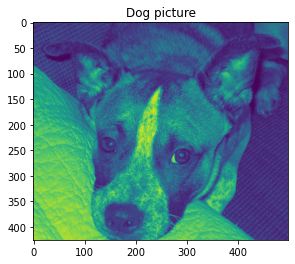

In [2]:
path = r'C:\Users\shaul\Final Project 2\ML-Sem2-Assignment\train\train\dog.156.jpg'

img_dog = cv2.imread(path,0)


plt.imshow(img_dog)
plt.title('Dog picture')
plt.show()

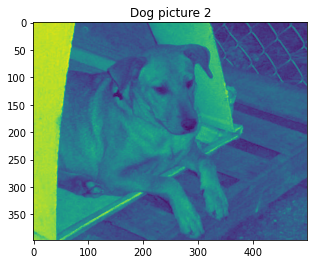

In [3]:
path = r'C:\Users\shaul\Final Project 2\ML-Sem2-Assignment\train\train\dog.100.jpg'

img_dog2 = cv2.imread(path,0)


plt.imshow(img_dog2)
plt.title('Dog picture 2')
plt.show()

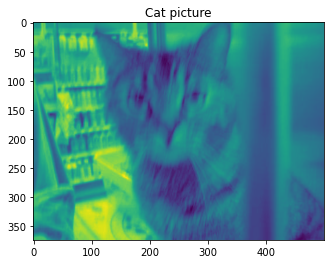

In [4]:
path = r'C:\Users\shaul\Final Project 2\ML-Sem2-Assignment\train\train\cat.156.jpg'

img_cat = cv2.imread(path,0)

plt.imshow(img_cat)
plt.title('Cat picture')
plt.show()

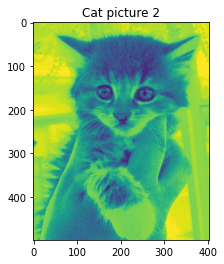

In [5]:
path = r'C:\Users\shaul\Final Project 2\ML-Sem2-Assignment\train\train\cat.100.jpg'

img_cat2 = cv2.imread(path,0)

plt.imshow(img_cat2)
plt.title('Cat picture 2')
plt.show()

#### Now lets see the size of the pictures we just showed

In [6]:
print('Dogs picture 1 size : ',img_dog.shape)
print('Dogs picture 2 size : ',img_dog2.shape)
print('Cats picture 1 size : ',img_cat.shape)
print('Cats picture 2 size : ',img_cat2.shape)

Dogs picture 1 size :  (426, 499)
Dogs picture 2 size :  (397, 500)
Cats picture 1 size :  (374, 500)
Cats picture 2 size :  (499, 403)


As we can see the sizes of our pictures are different(even 2 cat pictures are of different sizes).<br> <b>Therefore we will resize all of our pictures and turn them into A dataset. 

The following code of resizing, graysclaing and turning are images into A data set I wrote based on this
https://pythonprogramming.net/convolutional-neural-network-kats-vs-dogs-machine-learning-tutorial/

In [3]:
TRAIN_DIR = r'C:\Users\shaul\Final Project 2\ML-Sem2-Assignment\train\train' 
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [4]:
def label_img(img):
    word_label = img.split('.')[-3]
   
    if word_label == 'cat': return 1
    #                             
    elif word_label == 'dog': return 0

In [5]:
labal_data =[]
training_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append(pd.Series(img.flatten()))
        labal_data.append(label)

100%|██████████| 25000/25000 [05:36<00:00, 74.35it/s]


In [6]:
images_df = pd.DataFrame(training_data)
labels_df = pd.DataFrame(labal_data, columns = ['labels'])

In [7]:
df = pd.concat([images_df, labels_df], axis=1)

*Finally We have A data set!*

## Understanding and Cleaning are data

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,labels
0,92,169,208,100,177,216,104,182,225,110,...,0,2,2,0,2,2,0,2,2,1
1,43,43,39,64,58,55,36,40,35,44,...,47,53,70,52,57,75,20,26,39,1
2,53,45,38,61,47,41,64,54,47,69,...,52,150,165,2,183,185,10,183,187,1
3,217,222,221,220,225,224,237,235,235,239,...,208,210,210,218,220,219,207,212,215,1
4,72,109,137,83,120,148,48,87,115,90,...,82,105,120,59,91,102,64,90,102,1


In [9]:
df.shape

(25000, 7501)

In [10]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
7496      0
7497      0
7498      0
7499      0
labels    0
Length: 7501, dtype: int64

In [11]:
df['labels'].value_counts()

1    12500
0    12500
Name: labels, dtype: int64

Great! no null values and are labels are balanced. We can move on to preprocessing

## Data split and Preprocessing

In [12]:
X= df.drop(['labels'],axis=1)
y=df['labels']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)
print(" Shape of x_train = ", X_train.shape)
print(" Shape of x_test = ", X_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (17500, 7500)
 Shape of x_test =  (7500, 7500)
 Shape of y_train =  (17500,)
 Shape of y_test =  (7500,)


In [43]:
scale_pipeline = Pipeline([
 ("std_scaler", StandardScaler()),
 ("pca", PCA(n_components=0.90, random_state=0,svd_solver='full')),
])
x_train_reduced = scale_pipeline.fit_transform(X_train)
x_test_reduced = scale_pipeline.transform(X_test)

## It's time to start training models!
<br>
<br>note: We will print out classification reports only for our strongest models.

###  Knn Classifier

In [21]:
knn_clf =  KNeighborsClassifier(n_neighbors=53,weights='distance',n_jobs=-1)

knn_clf.fit(x_train_reduced,y_train)
knn_clf.score(x_test_reduced,y_test)

0.6189333333333333

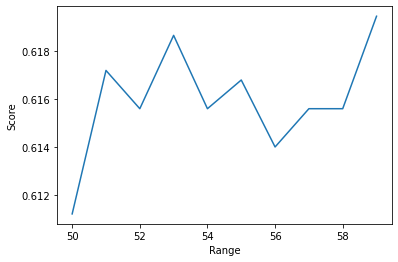

In [20]:
score_array = []
for each in range(50,60):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(x_train_reduced,y_train)
    score_array.append(knn_loop.score(x_test_reduced,y_test))
    
plt.plot(range(50,60),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

### Logistic Regression

In [21]:
log_reg = LogisticRegression(random_state=42,solver='liblinear',n_jobs=-1)
log_reg.fit(x_train_reduced, y_train)
log_reg.score(x_test_reduced, y_test)

0.6121333333333333

### Gaussian  Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb_clf =  GaussianNB()

gnb_clf.fit(x_train_reduced,y_train)
gnb_clf.score(x_test_reduced,y_test)

0.5658666666666666

# Ensemble methods

###  Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_rf = RandomForestClassifier(criterion ='entropy' ,max_features='sqrt' , min_samples_leaf=4, min_samples_split=3,n_estimators=250 , n_jobs = -1, random_state =42, 
                                  max_depth=50)
model_rf.fit(x_train_reduced, y_train)
prediction_test = model_rf.predict(x_test_reduced)
(metrics.accuracy_score(y_test, prediction_test))

0.6389333333333334

#### Note, We entered these parameters after running A grid search. 

###  AdaBoost

In [52]:
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=3), n_estimators=150,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(x_train_reduced, y_train)
prediction_test = ada_clf.predict(x_test_reduced)
(metrics.accuracy_score(y_test, prediction_test))

0.6338666666666667

#### Note, We entered these parameters after running A grid search. 

###  XGBoost

In [17]:
# from xgboost.sklearn import XGBClassifier
xg_boost = XGBClassifier(subsample=1 ,n_estimators = 150,min_child_weight=5,max_depth=3,learning_rate=0.2, gamma=2, n_jobs = -1,colsample_bytree=1)
xg_boost.fit(x_train_reduced,y_train)
xg_boost.score(x_test_reduced, y_test)

[21:23:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6546666666666666

#### Note, We entered these parameters after running A grid search. 

In [18]:
report = classification_report(y_test, xg_boost.predict(x_test_reduced))
print(report)

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      3724
           1       0.65      0.66      0.66      3776

    accuracy                           0.65      7500
   macro avg       0.65      0.65      0.65      7500
weighted avg       0.65      0.65      0.65      7500



###  Voting Classifier

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
voting_clf = VotingClassifier(
 estimators=[('knn', knn_clf), ('rf', model_rf), ('xgb', xg_boost)],
 voting='soft')
voting_clf.fit(x_train_reduced, y_train)
for clf in (knn_clf, model_rf, xg_boost,voting_clf):
     clf.fit(x_train_reduced, y_train)
     y_pred = clf.predict(x_test_reduced)
     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

[21:29:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
KNeighborsClassifier 0.6189333333333333
RandomForestClassifier 0.6389333333333334
[21:31:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.6546666666666666
[21:34:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.6636


In [26]:
report = classification_report(y_test, voting_clf.predict(x_test_reduced))
print(report)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      3724
           1       0.67      0.65      0.66      3776

    accuracy                           0.66      7500
   macro avg       0.66      0.66      0.66      7500
weighted avg       0.66      0.66      0.66      7500



In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
voting_clf = VotingClassifier(
 estimators=[('knn', knn_clf), ('rf', model_rf), ('xgb', xg_boost)],
 voting='hard')
voting_clf.fit(x_train_reduced, y_train)
for clf in (knn_clf, model_rf, xg_boost,voting_clf):
     clf.fit(x_train_reduced, y_train)
     y_pred = clf.predict(x_test_reduced)
     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

[01:49:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
KNeighborsClassifier 0.6189333333333333
RandomForestClassifier 0.6072
[01:51:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.6546666666666666
[01:52:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.6505333333333333


###  Stacking

In [24]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('knn' , knn_clf),
    ('rf', model_rf),
    ('xgb' , xg_boost)
]
stc = StackingClassifier(
    estimators=estimators, final_estimator=xg_boost
)
stc.fit(x_train_reduced,y_train)
stc.score(x_test_reduced, y_test)

[21:37:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:45:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:46:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.6621333333333334

In [27]:
report = classification_report(y_test, stc.predict(x_test_reduced))
print(report)

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      3724
           1       0.66      0.69      0.67      3776

    accuracy                           0.66      7500
   macro avg       0.66      0.66      0.66      7500
weighted avg       0.66      0.66      0.66      7500



### Bagging

In [41]:
bag_clf = BaggingClassifier(
 xg_boost, n_estimators=30,
 random_state=40, bootstrap_features=True, n_jobs=-1)
bag_clf.fit(x_train_reduced, y_train)
bag_clf.score(x_test_reduced, y_test)

0.6645333333333333

#### Note, We entered these parameters after running A grid search. 

In [32]:
report = classification_report(y_test, bag_clf.predict(x_test_reduced))
print(report)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      3724
           1       0.66      0.68      0.67      3776

    accuracy                           0.66      7500
   macro avg       0.66      0.66      0.66      7500
weighted avg       0.66      0.66      0.66      7500



### To conclude we achieved an accuracy of - 0.6645333333333333 with bagging through xgboost 
* We used 0.95 components for our pca. That is the smallest number of components while maintaining high accuracy we achieved.
* We can see the classification report for our best model right above. We can see the model is balanced and this is an all around great score